In [1]:
# Makes the display take up more of the screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
import numpy as np

In [10]:
class Agent():
    def __init__(self, eps=0.1, gamma=0.99):
        self.Q={}
        self.sum_space= [i for i in range(4,22)]
        self.dealer_show_card_space= [i+1 for i in range(10)]
        self.ace_space= [False, True]
        self.action_space= [0,1] # stick or hit
        
        self.state_space = []
        self.memory = []
        self.pairs_visited = {}
        self.returns = {}
        
        self.gamma = gamma
        self.eps = eps
        
        self.init_vals()
        self.init_policy()
        
    def init_vals(self):
        for total in self.sum_space:
            for card in self.dealer_show_card_space:
                for ace in self.ace_space:
                    state = (total, card, ace)
                    self.state_space.append(state)
                    for action in self.action_space:
                        self.Q[(state, action)]=0
                        self.returns[(state, action)]=[]
                        self.pairs_visited[(state, action)]=0
    
    def init_policy(self):
        policy={}
        n = len(self.action_space)
        for state in self.state_space:
            policy[state]= [1/n for _ in range(n)]
            
        self.policy = policy
        
    def choose_action(self, state):
        action = np.random.choice(self.action_space, p = self.policy[state])
        return action
    
    def update_Q(self):
        for idt, (state, action, _) in enumerate(self.memory):
            G = 0
            discount = 1
            if self.pairs_visited[(state,action)]==0:
                self.pairs_visited[(state, action)]+=1
                for t, (_, _, reward) in enumerate(self.memory[idt:]):
                    G+= reward *discount
                    discount *=self.gamma
                    self.returns[(state, action)].append(G)
                    
        for state, action, _ in self.memory:
            self.Q[(state, action)] = np.mean(self.returns[(state, action)])
            self.update_policy(state)
            
        for state_action in self.pairs_visited.keys():
            self.pairs_visited[state_action] = 0
            
        self.memory=[]
            
    def update_policy(self, state):
        actions = [self.Q[(state, a)] for a in self.action_space]
        a_max = np.argmax(actions)
        n_actions = len(self.action_space)
        probs=[]
        for action in self.action_space:
            prob = 1 - self.eps + self.eps / n_actions if action == a_max else self.eps /n_actions
            probs.append(prob)
            
        self.policy[state] = probs

In [22]:
import gym
import matplotlib.pyplot as plt

In [19]:
env = gym.make('Blackjack-v0')
agent = Agent(eps=0.001)
n_episodes = 20000
win_lose_draw = {-1:0,0:0, 1:0}
win_rate = []
for i in range(n_episodes):
    if i >0 and i %100 ==0:
        pct = win_lose_draw[1]/i
        win_rate.append(pct)
    if 1 % 50000==0:
        rates = win_rates[-1] if win_rates else 0.0
        print(f'starting episode {i}, win rate {round(rates,3)}')        
    observation = env.reset()
    done= False
    while not done:
        action = agent.choose_action(observation)
        observation_, reward, done, info = env.step(action)
        agent.memory.append((observation, action , reward))
        observation = observation_
    agent.update_Q()
    win_lose_draw[reward] +=1
    

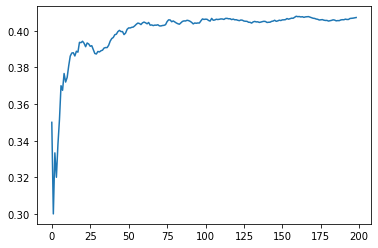

In [23]:
plt.plot(win_rate)
plt.show()